## Data Visualization Interface

This notebook is designed to facilitate the use of AIDOX - Module III: Data Visualization\
No changes need to be made to the VisualizationInterface class\
**The user is invited to run the following cells** to visualize the expected results obtained according to _opt_visualization_pydantic.yml_ file

In [1]:
import yaml
from aidox.models.pydantic_models_visualization import DataModel, InputFeature, OutputFeature
from aidox.optimization.handler_visualization import Visualization

/opt/anaconda3/envs/laser_opt/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open ('../../../configs/opt_visualization_pydantic.yml', 'r') as data_config:
    data_graph_cont = yaml.safe_load(data_config)

class VisualizationInterface():
    """ 
    This class reads the given yaml configuration file and 
    returns the corresponding ModelTraining object
        
    :param data_model_path: yaml configuration file path
    :return: DataModel object
    """
    def __init__(self, data_model_path):
        with open(data_model_path, 'r') as data_config:
            data_graph_cont = yaml.safe_load(data_config)
        self.dataframe = self.__init_df(data_graph_cont)
        self.input_list = self.__init_inputs(data_graph_cont)
        self.output_list = self.__init_outputs(data_graph_cont)

    def __call__(self):
        return DataModel(dataframe = self.dataframe, input_vars=self.input_list, output_vars=self.output_list)
    def __init_df(self, data_graph_cont:dict) -> str:
        dataframe = data_graph_cont['dataframe']
        return dataframe
    def __init_inputs(self, data_graph_cont:dict) -> list[InputFeature]:
        list_of_input_dicts = data_graph_cont['input_vars']
        return [InputFeature(**variable) for variable in list_of_input_dicts]
    def __init_outputs(self, data_graph_cont:dict) -> list[OutputFeature]:
        list_of_output_dicts = data_graph_cont['output_vars']
        return [OutputFeature(**variable) for variable in list_of_output_dicts]


In [3]:
data_graph_cont = VisualizationInterface('../../../configs/opt_visualization_pydantic.yml')()
graph = Visualization(data = data_graph_cont )


In [4]:
graph.scatter_plot(x = 'D', y = ['Output1', 'Output1_pred'], col = 'A', row = 'C', orders = {'A': [50, 75, 100],'C': [240,3880,8000]}, title = 'Design Optimization')

In [5]:
graph.scatter_plot(x = 'D', y = ['Output2', 'Output2_pred'], col = 'A', row = 'C', orders = {'A': [50, 75, 100],'C': [240,3880,8000]}, title = 'Design Optimization')

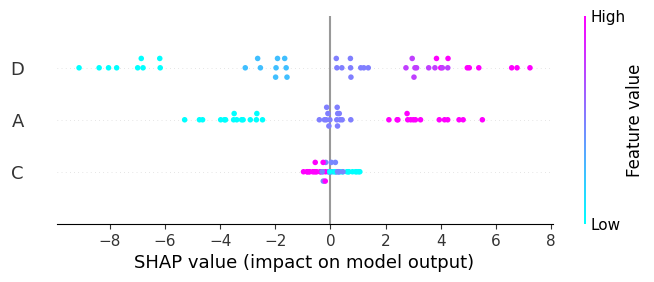

In [6]:
from sklearn.ensemble import RandomForestRegressor
# Shap analysis and centroids
graph.SHAP_analysis(target ='Output1', estimator = RandomForestRegressor(n_estimators=100, random_state=42))
shap_values_target_1 = graph.shap_values
graph.biplot_centroids()
feature_target1 = graph.features_target1    

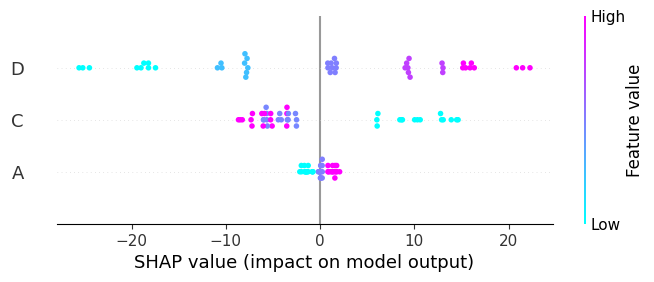

In [7]:
graph.SHAP_analysis(target ='Output2', estimator = RandomForestRegressor(n_estimators=100, random_state=42))
shap_values_target_2 = graph.shap_values
graph.biplot_centroids()
feature_target2 = graph.features_target1

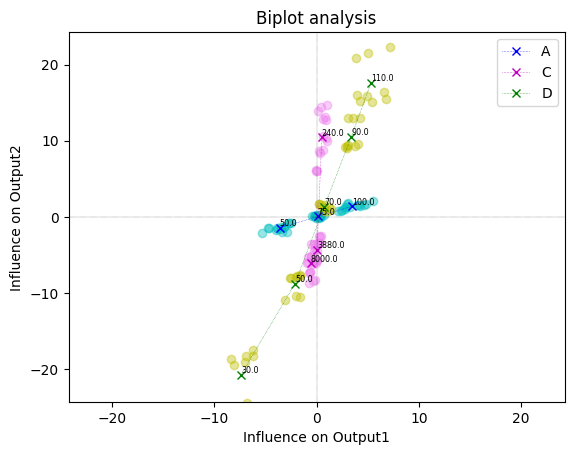

In [8]:
graph.biplot_features(shap_values_target_1 = shap_values_target_1, shap_values_target_2 = shap_values_target_2, features_target1 = feature_target1, features_target2 = feature_target2, title= 'Biplot analysis', colors_x =['b','m','green'], colors_points = ['c','violet','y'])